## LOS ANGELES - LAND PRICES

![alt text](https://i.pinimg.com/originals/12/73/a0/1273a0d5f49738ef24d431291a5aaa48.gif)

# Introduction

> For this final project, I gathered data from several webpages in order to find the best land for a client willing to open a barbershop in LA. 
I will bring our client a neat map showing crime rates and land classified by price ranges. 
With this I will also add a DataFrame showing the population and their category by neighborhood after finding the closets neighborhood by land as our client is willing to find a barbershop with a good balance between crime rates, population and prices.

# Let's impport the libraries

In [3]:
# !pip install geopandas
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from legend import add_categorical_legend

# Let's import the Scraped data
 > I cleaned it quickly too.

In [4]:
Crimes_rates = pd.read_csv('CSV DATA/Crimes_rates')
df = pd.read_csv('CSV DATA/Land_Prices')
df = df[df['Jurisdiction']!='Street, CA']

Here I import the DataFrame showing the distance between the *Land* that we are selling and another *Neighborhood* (I called them `Jurisdiction` in a the DateFrame) from which I know the Crime Rates.

In [5]:
distance_la = pd.read_csv('CSV DATA/distance_la').drop('Unnamed: 0', axis=1)
distance_la = distance_la.drop(index=[682, 13], axis=0).reset_index().drop('index', axis=1)
distance_la

,Neighborhood,Jurisdiction,Distance
0,"Beverly Hills, CA","Vernon, CA",17.23
1,"Beverly Hills, CA","Industry, CA",40.67
2,"Beverly Hills, CA","Irwindale, CA",42.76
3,"Beverly Hills, CA","Commerce, CA",23.31
4,"Beverly Hills, CA","Lancaster, CA",73.83
...,...,...,...
1929,"Granada Hills, CA","Temple City, CA",45.78
1930,"Granada Hills, CA","La Habra Heights, CA",62.29
1931,"Granada Hills, CA","La Verne, CA",71.36
1932,"Granada Hills, CA","Rolling Hills, CA",57.64


Here I am improving this DataFrame by adding the `Nearest Neighborhood` to this Land.

In [6]:
distance_la['Neighborhood'].unique()

array(['Beverly Hills, CA', 'Los Angeles, CA', 'West Hollywood, CA',
       'Granada Hills, CA', 'Wilmington, CA', 'Tujunga, CA',
       'Studio City, CA', 'Sunland, CA', 'Sherman Oaks, CA',
       'Woodland Hills, CA', 'Canoga Park, CA', 'Chatsworth, CA',
       'Pacific Palisades, CA', 'Winnetka, CA', 'Tarzana, CA',
       'Northridge, CA', 'Sun Valley, CA', 'Van Nuys, CA',
       'Valley Village, CA', 'North Hollywood, CA', 'Playa Del Rey, CA'],
      dtype=object)

In [7]:
juridictions = []

for ho in distance_la['Neighborhood'].unique():

    juridictions.append(distance_la[distance_la['Neighborhood']== ho].sort_values('Distance', ascending=True)['Jurisdiction'].head(5))

In [8]:
num = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num):
    try:
        columns.append('{}{} Nearest Neighborhood'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Nearest Neighborhood'.format(ind+1))
    
# create a new dataframe
Nearest_Neighborhood = pd.DataFrame(columns=columns)
Nearest_Neighborhood['Neighborhood'] = distance_la['Neighborhood'].drop_duplicates()
Nearest_Neighborhood = Nearest_Neighborhood.reset_index().drop('index', axis=1)

In [9]:
for ind in np.arange(Nearest_Neighborhood.shape[0]):
    Nearest_Neighborhood.iloc[ind, 1:] = juridictions[ind]

Nearest_Neighborhood.head()

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood
0,"Beverly Hills, CA","West Hollywood, CA","Culver City, CA","Santa Monica, CA","Inglewood, CA","Burbank, CA"
1,"Los Angeles, CA","Vernon, CA","Huntington Park, CA","Maywood, CA","Commerce, CA","Bell, CA"
2,"West Hollywood, CA","West Hollywood, CA","Beverly Hills, CA","Culver City, CA","Burbank, CA","Los Angeles, CA"
3,"Granada Hills, CA","San Fernando, CA","Santa Clarita, CA","Hidden Hills, CA","Calabasas, CA","Burbank, CA"
4,"Wilmington, CA","Carson, CA","Lomita, CA","Long Beach, CA","Rolling Hills, CA","Rolling Hills Estates, CA"


Our client also needed the mean price per `Neighborhood` with a graph showing the population per Neighborhoods.

In [10]:
pd.options.display.float_format = '{:.2f}'.format
mean_prices = df.groupby('Jurisdiction', as_index=False)['Prices'].mean()

Now I am going to append these prices to my previously built dataframe

In [11]:
Nearest_Neighborhood['Mean Prices'] = mean_prices['Prices']

In [12]:
Nearest_Neighborhood

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood,Mean Prices
0,"Beverly Hills, CA","West Hollywood, CA","Culver City, CA","Santa Monica, CA","Inglewood, CA","Burbank, CA",8976777.78
1,"Los Angeles, CA","Vernon, CA","Huntington Park, CA","Maywood, CA","Commerce, CA","Bell, CA",199000.00
2,"West Hollywood, CA","West Hollywood, CA","Beverly Hills, CA","Culver City, CA","Burbank, CA","Los Angeles, CA",1027500.00
3,"Granada Hills, CA","San Fernando, CA","Santa Clarita, CA","Hidden Hills, CA","Calabasas, CA","Burbank, CA",1881666.67
4,"Wilmington, CA","Carson, CA","Lomita, CA","Long Beach, CA","Rolling Hills, CA","Rolling Hills Estates, CA",1945381.93
5,"Tujunga, CA","Burbank, CA","La Cañada Flintridge, CA","Glendale, CA","San Fernando, CA","Pasadena, CA",1079500.00
6,"Studio City, CA","West Hollywood, CA","Burbank, CA","Beverly Hills, CA","Glendale, CA","Culver City, CA",2400000.00
7,"Sunland, CA","Burbank, CA","La Cañada Flintridge, CA","San Fernando, CA","Glendale, CA","Pasadena, CA",17300000.00
8,"Sherman Oaks, CA","West Hollywood, CA","Beverly Hills, CA","Burbank, CA","San Fernando, CA","Santa Monica, CA",1025000.00
9,"Woodland Hills, CA","Calabasas, CA","Hidden Hills, CA","Agoura Hills, CA","Malibu, CA","Westlake Village, CA",206000.00


In [13]:
# HERE IS OUT FINAL DATA!
Nearest_Neighborhood.head()

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood,Mean Prices
0,"Beverly Hills, CA","West Hollywood, CA","Culver City, CA","Santa Monica, CA","Inglewood, CA","Burbank, CA",8976777.78
1,"Los Angeles, CA","Vernon, CA","Huntington Park, CA","Maywood, CA","Commerce, CA","Bell, CA",199000.00
2,"West Hollywood, CA","West Hollywood, CA","Beverly Hills, CA","Culver City, CA","Burbank, CA","Los Angeles, CA",1027500.00
3,"Granada Hills, CA","San Fernando, CA","Santa Clarita, CA","Hidden Hills, CA","Calabasas, CA","Burbank, CA",1881666.67
4,"Wilmington, CA","Carson, CA","Lomita, CA","Long Beach, CA","Rolling Hills, CA","Rolling Hills Estates, CA",1945381.93


In [14]:
# Now let's Group our prices depending on prices ranges

In [15]:
Nearest_Neighborhood[Nearest_Neighborhood['Mean Prices'] > 199000.00]

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood,Mean Prices
0,"Beverly Hills, CA","West Hollywood, CA","Culver City, CA","Santa Monica, CA","Inglewood, CA","Burbank, CA",8976777.78
2,"West Hollywood, CA","West Hollywood, CA","Beverly Hills, CA","Culver City, CA","Burbank, CA","Los Angeles, CA",1027500.00
3,"Granada Hills, CA","San Fernando, CA","Santa Clarita, CA","Hidden Hills, CA","Calabasas, CA","Burbank, CA",1881666.67
4,"Wilmington, CA","Carson, CA","Lomita, CA","Long Beach, CA","Rolling Hills, CA","Rolling Hills Estates, CA",1945381.93
5,"Tujunga, CA","Burbank, CA","La Cañada Flintridge, CA","Glendale, CA","San Fernando, CA","Pasadena, CA",1079500.00
6,"Studio City, CA","West Hollywood, CA","Burbank, CA","Beverly Hills, CA","Glendale, CA","Culver City, CA",2400000.00
7,"Sunland, CA","Burbank, CA","La Cañada Flintridge, CA","San Fernando, CA","Glendale, CA","Pasadena, CA",17300000.00
8,"Sherman Oaks, CA","West Hollywood, CA","Beverly Hills, CA","Burbank, CA","San Fernando, CA","Santa Monica, CA",1025000.00
9,"Woodland Hills, CA","Calabasas, CA","Hidden Hills, CA","Agoura Hills, CA","Malibu, CA","Westlake Village, CA",206000.00
10,"Canoga Park, CA","Hidden Hills, CA","Calabasas, CA","Agoura Hills, CA","San Fernando, CA","Westlake Village, CA",812000.00


(array([16.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  199000.,  1909100.,  3619200.,  5329300.,  7039400.,  8749500.,
        10459600., 12169700., 13879800., 15589900., 17300000.]),
 <BarContainer object of 10 artists>)

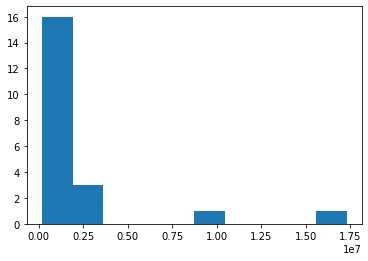

In [16]:
plt.hist(Nearest_Neighborhood['Mean Prices'])

In [17]:
# LET'S REMOVE THE OUTLIER THAT WE SEE HERE
part1 = Nearest_Neighborhood[Nearest_Neighborhood['Mean Prices'] < 5000000.00]
# plt.hist(part1['Mean Prices'], bins=3)

In [18]:
# For this part, 3 categories is enough for me is enough for me
bins = np.linspace(min(part1['Mean Prices']), max(part1['Mean Prices']), 4)
Category = ['Low Prices', 'Medium Prices', 'High Prices']

In [19]:
part1['Price Category'] = pd.cut(part1['Mean Prices'], bins, labels=Category, include_lowest=True )
part1[['Mean Prices','Price Category']].head()

C:\Users\mevaa\AppData\Local\Temp\ipykernel_2184\4278306251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part1['Price Category'] = pd.cut(part1['Mean Prices'], bins, labels=Category, include_lowest=True )


,Mean Prices,Price Category
1,199000.00,Low Prices
2,1027500.00,Medium Prices
3,1881666.67,High Prices
4,1945381.93,High Prices
5,1079500.00,Medium Prices


Now let's do the same thing with our outliers.

In [20]:
part2 = Nearest_Neighborhood[Nearest_Neighborhood['Mean Prices'] > 5000000.00]
part2['Price Category'] = ['Very High Prices','Very High Prices']
part2[['Mean Prices','Price Category']].head()

C:\Users\mevaa\AppData\Local\Temp\ipykernel_2184\1687565678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2['Price Category'] = ['Very High Prices','Very High Prices']


,Mean Prices,Price Category
0,8976777.78,Very High Prices
7,17300000.00,Very High Prices


In [21]:
frames = [part1, part2]
Nearest_Neighborhood = pd.concat(frames, ignore_index =True)

In [22]:
Nearest_Neighborhood['Longitude'] = df.drop_duplicates('Jurisdiction')[['Longitude']].reset_index(drop=True)
Nearest_Neighborhood['Latitude'] = df.drop_duplicates('Jurisdiction')[['Latitude']].reset_index(drop=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Nearest_Neighborhood['Category Encoded'] = le.fit_transform(Nearest_Neighborhood['Price Category'])
# Nearest_Neighborhood[['Category Encoded','Price Category']]

In [24]:
# Nearest_Neighborhood.to_csv('Nearest_Neighborhood')
Nearest_Neighborhood.head()

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood,Mean Prices,Price Category,Longitude,Latitude,Category Encoded
0,"Los Angeles, CA","Vernon, CA","Huntington Park, CA","Maywood, CA","Commerce, CA","Bell, CA",199000.00,Low Prices,-118.40,34.07,1
1,"West Hollywood, CA","West Hollywood, CA","Beverly Hills, CA","Culver City, CA","Burbank, CA","Los Angeles, CA",1027500.00,Medium Prices,-118.24,34.05,2
2,"Granada Hills, CA","San Fernando, CA","Santa Clarita, CA","Hidden Hills, CA","Calabasas, CA","Burbank, CA",1881666.67,High Prices,-118.37,34.09,0
3,"Wilmington, CA","Carson, CA","Lomita, CA","Long Beach, CA","Rolling Hills, CA","Rolling Hills Estates, CA",1945381.93,High Prices,-118.52,34.27,0
4,"Tujunga, CA","Burbank, CA","La Cañada Flintridge, CA","Glendale, CA","San Fernando, CA","Pasadena, CA",1079500.00,Medium Prices,-118.26,33.78,2


Here I created a map depending on Crime Rates and I added price categories to every lands.

In [25]:
location = df['Latitude'][3], df['Longitude'][3]

In [26]:
# THEN REMOVE THE OUTLIERS

# outlier_map_data = Crimes_rates[['Jurisdiction','Total Violent Crimes']][ (Crimes_rates['Levels of crimes']=='Very-High level') | (Crimes_rates['Levels of crimes']=='Very-Low level')]
no_outlier_map_data = Crimes_rates[['Jurisdiction','Total Violent Crimes']][ (Crimes_rates['Total Violent Crimes']  < 239545.5) & (Crimes_rates['Total Violent Crimes']  > 70)]

In [27]:
# CLEAN THE DATA BY DELETING THE ', CA' from Juridiction columns
list_1 = []

for i in range(2,172):
    list_1.append(no_outlier_map_data['Jurisdiction'][i].split(',')[0])

no_outlier_map_data['Jurisdiction'] = list_1

In [28]:
scale_no_outlier = np.linspace(min(no_outlier_map_data["Total Violent Crimes"]), max(no_outlier_map_data["Total Violent Crimes"]), 5)
scale_no_outlier = scale_no_outlier.tolist()
scale_no_outlier[-1] = scale_no_outlier[-1]+1

high_level = Crimes_rates[['Jurisdiction','Latitude','Longitude']][Crimes_rates['Levels of crimes']=='Very-High level'].values.tolist()
low_level = Crimes_rates[['Jurisdiction','Latitude','Longitude']][Crimes_rates['Levels of crimes']=='Very-Low level'].values.tolist()

# scale_outlier = np.linspace(min(outlier_map_data["Total Violent Crimes"]), max(outlier_map_data["Total Violent Crimes"]), 3)
# scale_outlier = scale_outlier.tolist()
# scale_outlier[-1] = scale_outlier[-1]+1

In [29]:
geojson = r'JSON MAP/los-angeles-county copy.json'

In [59]:
import folium

M = folium.Map(location=location, zoom_start=10, tiles="OpenStreetMap")

folium.Choropleth(
    geo_data=geojson,
    data=no_outlier_map_data,
    columns=['Jurisdiction','Total Violent Crimes'],
    key_on='feature.properties.name',
    threshold_scale=scale_no_outlier,
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Violent Crimes'
).add_to(M)

for i in high_level:
    M.add_child(folium.CircleMarker(location=[i[1],i[2]], 
                                     popup=i[0]+ ' Dangerous Place !', 
                                     icon=folium.Icon(color='black'),
                                     radius=15,
                                     color='black',
                                     fill=True,
                                     fill_color='#000',
                                     fill_opacity=0.7,
                                     parse_html=False))

for b in low_level:
    M.add_child(folium.CircleMarker(location=[b[1],b[2]], 
                                     popup=b[0]+ ' Very Safe Place !', 
                                     icon=folium.Icon(color='green'),
                                     radius=15,
                                     color='green',
                                     fill=True,
                                     fill_color='#75975e',
                                     fill_opacity=0.7,
                                     parse_html=False))
# M

In [31]:
# M.save('Crime_Rate_Map.html')

I saved it in an HTML File and add the different lands that I cetegorized

In [60]:
map_clusters = folium.Map(location=location, zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Nearest_Neighborhood['Latitude'],Nearest_Neighborhood['Longitude'], Nearest_Neighborhood['Neighborhood'],Nearest_Neighborhood['Category Encoded']):
    label = folium.Popup(str(poi) + ' Color ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=19,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(M)

converted_list = df[['Jurisdiction','Latitude','Longitude']].values.tolist()

for i_1 in converted_list:
    folium.Marker(
    location=[i_1[1],i_1[2]],
    popup=i_1[0],
    icon=folium.Icon(color="black", icon="info-sign"),).add_to(M)


In [61]:
M = add_categorical_legend(M, 'Total Violent Crimes (Outliers)', colors = ['#000','#75975e'], labels = ['Very Dangerous Place', 'Very Safe Place'])
M = add_categorical_legend(M, 'Price Category', colors = ['#8000ff','#ff0000','#2adddd','#d4dd80'], labels = ['Low Prices', 'High Prices', 'Medium Prices','Very High Prices '])

M

In [62]:
M.save('Crime_Rate_Map2.html')

In order to have a better look of the price range here are the DataFrames.

In [69]:
# Low Prices
Nearest_Neighborhood[Nearest_Neighborhood['Category Encoded']==1]

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood,Mean Prices,Price Category,Longitude,Latitude,Category Encoded
0,"Los Angeles, CA","Vernon, CA","Huntington Park, CA","Maywood, CA","Commerce, CA","Bell, CA",199000.00,Low Prices,-118.40,34.07,1
7,"Woodland Hills, CA","Calabasas, CA","Hidden Hills, CA","Agoura Hills, CA","Malibu, CA","Westlake Village, CA",206000.00,Low Prices,-118.30,34.27,1
8,"Canoga Park, CA","Hidden Hills, CA","Calabasas, CA","Agoura Hills, CA","San Fernando, CA","Westlake Village, CA",812000.00,Low Prices,-118.45,34.15,1
10,"Pacific Palisades, CA","Santa Monica, CA","Beverly Hills, CA","Culver City, CA","Malibu, CA","Calabasas, CA",550000.00,Low Prices,-118.60,34.20,1
12,"Tarzana, CA","Calabasas, CA","Hidden Hills, CA","San Fernando, CA","Beverly Hills, CA","Santa Monica, CA",569520.00,Low Prices,-118.53,34.05,1
15,"Van Nuys, CA","San Fernando, CA","Burbank, CA","West Hollywood, CA","Beverly Hills, CA","Calabasas, CA",721666.67,Low Prices,-118.54,34.23,1
16,"Valley Village, CA","Burbank, CA","West Hollywood, CA","Beverly Hills, CA","Glendale, CA","San Fernando, CA",360000.00,Low Prices,-118.39,34.22,1
17,"North Hollywood, CA","Burbank, CA","West Hollywood, CA","Beverly Hills, CA","Glendale, CA","San Fernando, CA",450000.00,Low Prices,-118.45,34.19,1
18,"Playa Del Rey, CA","El Segundo, CA","Inglewood, CA","Manhattan Beach, CA","Culver City, CA","Santa Monica, CA",326000.00,Low Prices,-118.40,34.16,1


In [70]:
# Medium Prices
Nearest_Neighborhood[Nearest_Neighborhood['Category Encoded']==2]

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood,Mean Prices,Price Category,Longitude,Latitude,Category Encoded
1,"West Hollywood, CA","West Hollywood, CA","Beverly Hills, CA","Culver City, CA","Burbank, CA","Los Angeles, CA",1027500.00,Medium Prices,-118.24,34.05,2
4,"Tujunga, CA","Burbank, CA","La Cañada Flintridge, CA","Glendale, CA","San Fernando, CA","Pasadena, CA",1079500.00,Medium Prices,-118.26,33.78,2
6,"Sherman Oaks, CA","West Hollywood, CA","Beverly Hills, CA","Burbank, CA","San Fernando, CA","Santa Monica, CA",1025000.00,Medium Prices,-118.40,34.15,2
9,"Chatsworth, CA","Hidden Hills, CA","Hidden Hills, CA","Calabasas, CA","Calabasas, CA","San Fernando, CA",1500000.00,Medium Prices,-118.61,34.17,2
14,"Sun Valley, CA","Burbank, CA","San Fernando, CA","West Hollywood, CA","Glendale, CA","Beverly Hills, CA",1050000.00,Medium Prices,-118.54,34.17,2


In [71]:
# High Prices
Nearest_Neighborhood[Nearest_Neighborhood['Category Encoded']==0]

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood,Mean Prices,Price Category,Longitude,Latitude,Category Encoded
2,"Granada Hills, CA","San Fernando, CA","Santa Clarita, CA","Hidden Hills, CA","Calabasas, CA","Burbank, CA",1881666.67,High Prices,-118.37,34.09,0
3,"Wilmington, CA","Carson, CA","Lomita, CA","Long Beach, CA","Rolling Hills, CA","Rolling Hills Estates, CA",1945381.93,High Prices,-118.52,34.27,0
5,"Studio City, CA","West Hollywood, CA","Burbank, CA","Beverly Hills, CA","Glendale, CA","Culver City, CA",2400000.00,High Prices,-118.29,34.25,0
11,"Winnetka, CA","Hidden Hills, CA","Calabasas, CA","San Fernando, CA","Agoura Hills, CA","Santa Clarita, CA",2350000.00,High Prices,-118.60,34.26,0
13,"Northridge, CA","San Fernando, CA","Hidden Hills, CA","Calabasas, CA","Santa Clarita, CA","Burbank, CA",1790000.00,High Prices,-118.57,34.20,0


In [72]:
# Very High Prices
Nearest_Neighborhood[Nearest_Neighborhood['Category Encoded']==3]

,Neighborhood,1st Nearest Neighborhood,2nd Nearest Neighborhood,3rd Nearest Neighborhood,4th Nearest Neighborhood,5th Nearest Neighborhood,Mean Prices,Price Category,Longitude,Latitude,Category Encoded
19,"Beverly Hills, CA","West Hollywood, CA","Culver City, CA","Santa Monica, CA","Inglewood, CA","Burbank, CA",8976777.78,Very High Prices,-118.37,34.16,3
20,"Sunland, CA","Burbank, CA","La Cañada Flintridge, CA","San Fernando, CA","Glendale, CA","Pasadena, CA",17300000.00,Very High Prices,-118.44,33.95,3


Now here is the DataFrame showing population per neighborhood.

In [81]:
Population = pd.read_csv('CSV DATA/Population_LA')
Population[['Neighborhood','Total Population, All Races', 'Level of Population']][Population['Neighborhood']=='Tujunga, Los Angeles']

,Neighborhood,"Total Population, All Races",Level of Population
58,"Tujunga, Los Angeles",25323,Least populated


Based on this DataFrame, our client will see the `Level of Population` and the `Total Population` of a `Neighborhood`, add these additional information with the map and make a better decision. Here we have the total population and the level of population of Tujunga which is *`Least Populated`* compared to others.

# Conclusion

> Los Angeles is the second largest city in the United States of America. Finding a good place to open a business can be complicated when we don't take the time to study the area before making a choice. Thanks to this maps, my client or even more people that are willing to find a good place in order to open a business in Los Angeles can use these tools before purchasing a Land or even a Commercial Property. But many more parameters can be added to this tool to make it perfect like the profitability of a certain area or the average income in the Neighborbood.